In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

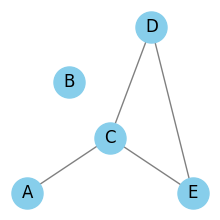

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes with positions reflecting real distances
positions = {
    'A': (0, 0),
    'B': (1, 2),
    'C': (2, 1),
    'D': (3, 3),
    'E': (4, 0)
}

# Add nodes to the graph
for node in positions.keys():
    G.add_node(node)

# Add edges (with weights representing distances)
edges = [
    # ('A', 'B', 2.24),  # Distance calculated using Euclidean distance
    ('A', 'C', 2.24),
    # ('B', 'D', 2.24),
    ('C', 'D', 2.24),
    ('D', 'E', 3.16),
    ('C', 'E', 2.0)
]

# Add edges to the graph with weights
for u, v, weight in edges:
    G.add_edge(u, v, weight=weight)

# Draw the graph using the specified positions
plt.figure(figsize=(2, 2))
nx.draw(G, pos=positions, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')

# Draw edge labels with distances
# edge_labels = {(u, v): f"{}" for u, v, d in G.edges(data=True)}
# nx.draw_networkx_edge_labels(G, pos=positions)
plt.savefig("graph.png")
plt.show()



In [29]:
nx.shortest_path(G, 2, 65)

[2, 14, 62, 65]

In [10]:
for cycle in nx.simple_cycles(G):
    print(cycle)

[0, 1, 2]
[0, 1, 2, 3]
[0, 2, 3]


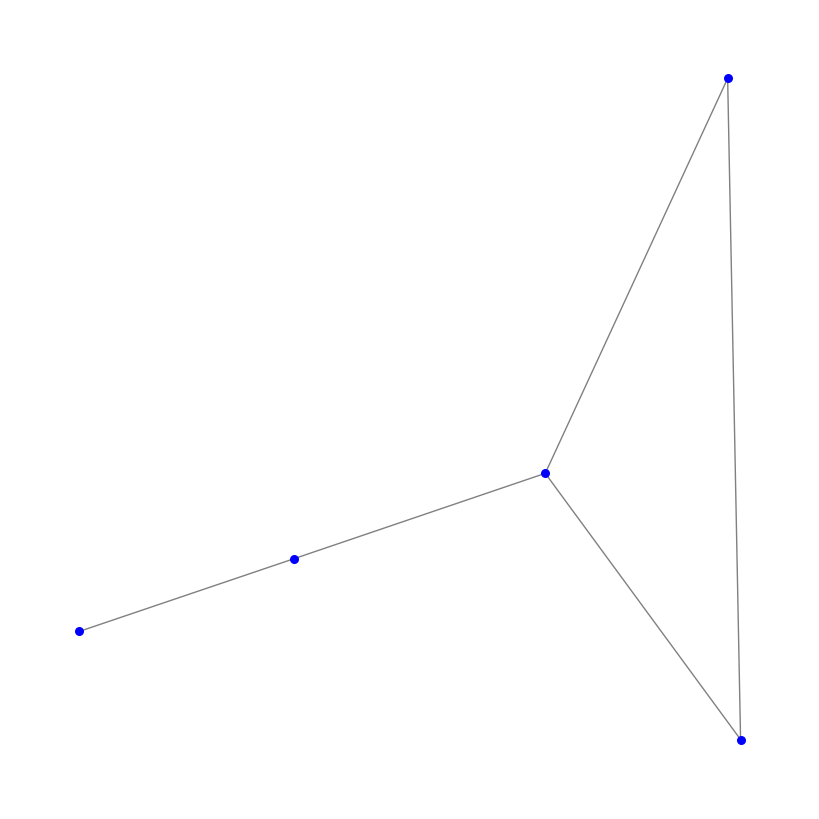

In [38]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def combined_random_geometric_erdos_renyi(n, r, p):
    G = nx.Graph()
    
    # Step 1: Generate random positions for the nodes
    positions = {i: (np.random.rand(), np.random.rand()) for i in range(n)}
    nx.set_node_attributes(G, positions, 'pos')
    
    # Step 2: Add nodes to the graph
    G.add_nodes_from(positions.keys())
    
    # Step 3: Add edges based on geometric distance
    nodes = list(G.nodes)
    for i in range(n):
        for j in range(i + 1, n):
            pos_i = positions[i]
            pos_j = positions[j]
            distance = np.sqrt((pos_i[0] - pos_j[0])**2 + (pos_i[1] - pos_j[1])**2)
            if distance <= r:
                G.add_edge(i, j)
    
    # Step 4: Add additional edges based on Erdős-Rényi model
    for i in range(n):
        for j in range(i + 1, n):
            if not G.has_edge(i, j):  # Check if there's already an edge
                if np.random.rand() < p:
                    G.add_edge(i, j)
    
    return G

# Parameters
n = 5  # number of nodes
r = 0.5  # distance threshold for geometric graph
p = 0.0  # probability for additional Erdős-Rényi edges

# Generate the combined graph
G = combined_random_geometric_erdos_renyi(n, r, p)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(8, 8))
nx.draw(G, with_labels=False, node_size=30, node_color='blue', edge_color='gray')
plt.show()
